# Analyzing Diabetes DataSet - Question 3

In this Notebook I will formulate my own research questions or hypothesis and investigate it by writing some Python codes to test it, then write a report of my findings. That's all for **Question 3** of the **TMA**. 

## Printing Diabetes Dataset

In [1]:
# It's important to import needed libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First: lets print the dataset.
diabetes_url = 'diabetes_dataset00.csv'

DiaData = pd.read_csv(diabetes_url)
DiaData.head(15)

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No
5,LADA,Positive,Negative,Yes,Present,17,41,26,Moderate,Healthy,...,85,Yes,No,Negative,2,Normal,52,Ketones Present,3835,Yes
6,Type 2 Diabetes,Negative,Negative,No,Absent,29,30,31,Moderate,Healthy,...,64,Yes,Yes,Negative,3,Abnormal,96,Ketones Present,4426,No
7,Wolcott-Rallison Syndrome,Positive,Negative,No,Absent,10,3,18,Low,Unhealthy,...,44,Yes,No,Negative,1,Normal,29,Ketones Present,1644,Yes
8,Secondary Diabetes,Negative,Positive,No,Absent,47,47,25,High,Healthy,...,71,No,Yes,Positive,3,Normal,74,Ketones Present,3721,No
9,Secondary Diabetes,Positive,Negative,Yes,Present,21,72,24,Low,Unhealthy,...,69,Yes,Yes,Positive,2,Abnormal,42,Protein Present,4206,No


## The Studying of Research

In this part I will start investigating the relationship between the Age, BMI, and Target.

### Identifying the Investigation 

In this investigation I will try to find the relationship between the Age and the Target, and whether the BMI affect on the Target or not.

In [2]:
# Now I'll find the descriptive statistics for Age, BMI, and count the value of Target.
age_bmi_describtive = DiaData[['Age', 'BMI']].describe()
target_val = DiaData['Target'].value_counts()

print('Descriptive statistics for Age and BMI:\n',age_bmi_describtive)
print('\nThe distribution of Target:\n',target_val)

Descriptive statistics for Age and BMI:
                 Age           BMI
count  70000.000000  70000.000000
mean      32.020700     24.782943
std       21.043173      6.014236
min        0.000000     12.000000
25%       14.000000     20.000000
50%       31.000000     25.000000
75%       49.000000     29.000000
max       79.000000     39.000000

The distribution of Target:
 MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA       

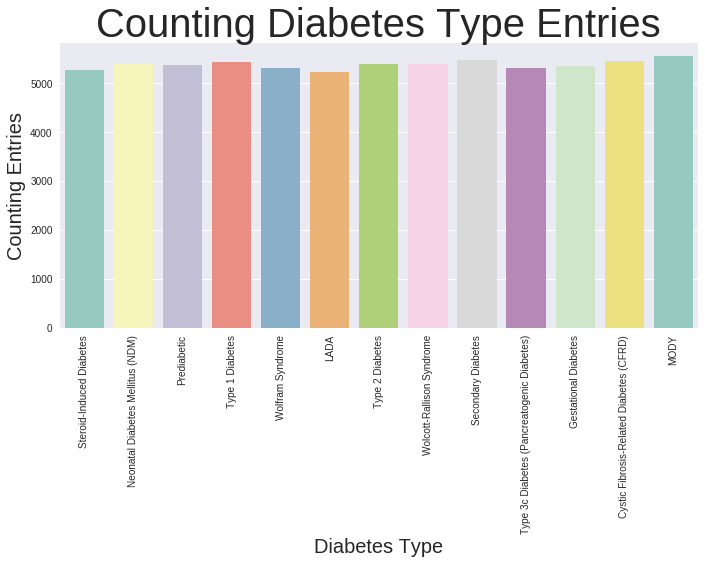

In [3]:
# Here let's repsresent the number of each diabetes type in a graph
plt.figure(figsize=(10,8))

sns.countplot(x=DiaData['Target'],palette='Set3')

plt.xticks(rotation=90) # rottation used to write the xticks in different direction.

plt.title('Counting Diabetes Type Entries',size=40)
plt.xlabel('Diabetes Type',size=20)
plt.ylabel('Counting Entries',size=20)

plt.tight_layout() # It'll adjusts subplot params fdo that the subplot(s) fits in to the figure area.
plt.show() #will show the graph.

In [4]:
# Here I'll create a new dataset consist of Target, Age and BMI.
DiaStudy = DiaData[['Target','Age','BMI']]
DiaStudy.head(15)

,Target,Age,BMI
0,Steroid-Induced Diabetes,44,38
1,Neonatal Diabetes Mellitus (NDM),1,17
2,Prediabetic,36,24
3,Type 1 Diabetes,7,16
4,Wolfram Syndrome,10,17
5,LADA,41,26
6,Type 2 Diabetes,30,31
7,Wolcott-Rallison Syndrome,3,18
8,Secondary Diabetes,47,25
9,Secondary Diabetes,72,24


### Target Vs. Age

After creating a new dataset consists of the Target, Age, BMI, and Physical Activity. Now I will try to find the relationship between each Target type and Age.

First, I'll hypothesize that each type of diabetes affects a specific range of ages or the age maybe concentrating around a certain range of ages.

Now I'll find the range of ages for each type.

In [5]:
# Finding the range of ages for each diabetes type by finding the min and max.
age_range = DiaStudy.groupby('Target')['Age'].agg(['min','max'])
age_range.sort_values('min')

,min,max
Target,,
Neonatal Diabetes Mellitus (NDM),0,1
Wolcott-Rallison Syndrome,1,14
Type 1 Diabetes,5,29
Wolfram Syndrome,5,19
Cystic Fibrosis-Related Diabetes (CFRD),10,39
MODY,10,29
Gestational Diabetes,20,39
LADA,30,59
Prediabetic,30,59


After represinting the range of Age for each Target we can see there are some types of diabetes affect a certain range of ages. 

For example, Neontal Diabetes Millitus (NDM) affect newborns whose age around months and a year, while Wolcott-Rallison Syndrome affect the childs whose age around one to 14 years. Also, we have LADA, Prediabetic, Steroid-Induced Diabetes and Type 2 Diabetes affect people from age 30 up to different ages greater than 59, which differ for each type.

Although I found the range of Ages for each Target type but this Information alone is not enough. However, to support my hypothesis I'll find the mean value of ages.

In [6]:
# Here I'll find the average values of Ages to each diabetes type.
mean_age = DiaStudy.groupby('Target')['Age'].mean()
mean_age.round(2).sort_values()

Target
Neonatal Diabetes Mellitus (NDM)               0.51
Wolcott-Rallison Syndrome                      7.49
Wolfram Syndrome                              11.92
Type 1 Diabetes                               17.07
MODY                                          19.58
Cystic Fibrosis-Related Diabetes (CFRD)       24.42
Gestational Diabetes                          29.50
Prediabetic                                   44.32
LADA                                          44.45
Steroid-Induced Diabetes                      49.50
Type 3c Diabetes (Pancreatogenic Diabetes)    54.51
Type 2 Diabetes                               54.61
Secondary Diabetes                            59.49
Name: Age, dtype: float64

finding the mean value Age for each Target type enhance the hypothesis where every type of ages has an average different than the other type. But also we can see that we have some group of Target types have almost the same average value. 

But now I'll search about the most frequent Age value. So, to find whether my hypothesis is correct or not. 

In [7]:
# In the following way I can finde the mode of ages for each diabetes type.
mode_age = DiaStudy.groupby('Target')['Age'].agg(lambda x: x.mode().iloc[0])
mode_age.sort_values()

Target
Neonatal Diabetes Mellitus (NDM)               1
Wolcott-Rallison Syndrome                      9
Wolfram Syndrome                              10
Type 1 Diabetes                               14
Cystic Fibrosis-Related Diabetes (CFRD)       18
Gestational Diabetes                          21
MODY                                          24
Prediabetic                                   36
Type 3c Diabetes (Pancreatogenic Diabetes)    53
LADA                                          54
Type 2 Diabetes                               54
Steroid-Induced Diabetes                      60
Secondary Diabetes                            79
Name: Age, dtype: int64

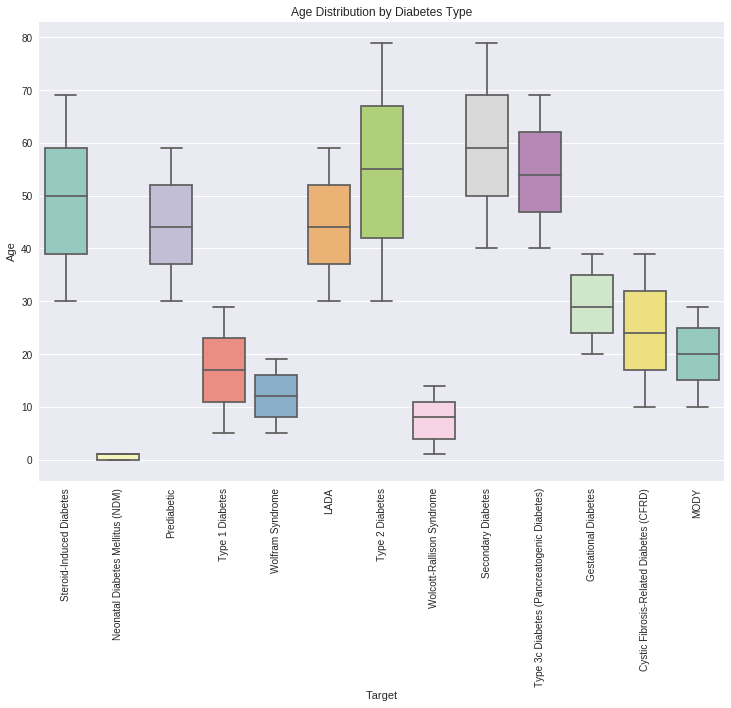

In [8]:
# Here I'll represent the range of ages for each diabetes type using boxplot from the seaborn library.
diabetes_table = DiaStudy['Target'].unique()

# Specifying the figure size
plt.figure(figsize=(20,10))

# The boxplot of the Age and Target.
plt.subplot(1,2,1)
sns.boxplot(x='Target',y='Age',data=DiaStudy,palette='Set3')

plt.xticks(rotation=90) # rottation used to write the xticks in different direction.
plt.title('Age Distribution by Diabetes Type')

plt.tight_layout() # It'll adjusts subplot params fdo that the subplot(s) fits in to the figure area.
plt.show() #will show the graph.

Finally, after representing the plot box, it is clear that each type of diabetes affects a specific age group. It can be seen from the graph that NDM affects newborns who are one year old or less, Wolcott-Rallison affects children from one year old to 14 years old, Type 1 Diabetes and Wolfram Syndrome affect children from 5 years old to 29 and 19 years old respectively. This applies to all types of diabetes, some of which start to get infected at the same age, but with increasing age, the incidence of the disease may increase.

### Age & BMI Vs. Target

In this part I will try to find the relationship between Age, BMI and Target which is the type of the diabetes.

I'll hypothesize that each range of Ages and BMI are often associated with diabetes types which is the Target. For example if the person is old the BMI will be higher for them more than the BMI for the unger people.
 
Now I will represent the Age and BMI ranges and average values for each diabeters type (Target).

In [9]:
#Age & BMI crosstab
pd.crosstab(DiaStudy['Age'],DiaStudy['BMI'])

BMI,12,13,14,15,16,17,18,19,20,21,...,30,31,32,33,34,35,36,37,38,39
Age,,,,,,,,,,,,,,,,,,,,,
0,344,357,308,351,302,350,310,333,0,0,...,0,0,0,0,0,0,0,0,0,0
1,349,310,384,382,380,391,367,396,47,41,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,48,43,35,48,37,36,42,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,40,46,35,30,35,27,43,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,41,25,25,42,31,35,46,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,86,103,95,90,86,99,95,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,99,95,94,101,82,107,88,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,84,98,98,102,97,116,100,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,113,91,113,87,82,76,91,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#The average values of range of age and BMI for each diabetes type.
DiaPivot=DiaStudy.pivot_table(index=['Target'])
DiaPivot.sort_values('Age')

,Age,BMI
Target,,
Neonatal Diabetes Mellitus (NDM),0.509061,15.473558
Wolcott-Rallison Syndrome,7.487222,19.515000
Wolfram Syndrome,11.920978,19.512512
Type 1 Diabetes,17.065002,19.517260
MODY,19.584909,23.382316
Cystic Fibrosis-Related Diabetes (CFRD),24.416179,25.974012
Gestational Diabetes,29.503181,27.053518
Prediabetic,44.315476,25.980283
LADA,44.447253,27.061076


In [11]:
# Finding the range and the average values of Age and BMI.
age_bmi_range = DiaStudy.groupby('Target').agg({
    'Age':['min','max','mean'],
    'BMI':['min','max','mean']})
age_bmi_range.sort_values(by=('Age','min'))

BMI                Age      \
                                           min max       mean min max   
Target                                                                  
Neonatal Diabetes Mellitus (NDM)            12  19  15.473558   0   1   
Wolcott-Rallison Syndrome                   15  24  19.515000   1  14   
Type 1 Diabetes                             15  24  19.517260   5  29   
Wolfram Syndrome                            15  24  19.512512   5  19   
Cystic Fibrosis-Related Diabetes (CFRD)     18  34  25.974012  10  39   
MODY                                        18  29  23.382316  10  29   
Gestational Diabetes                        20  34  27.053518  20  39   
LADA                                        20  34  27.061076  30  59   
Prediabetic                                 24  28  25.980283  30  59   
Steroid-Induced Diabetes                    20  39  29.469573  30  69   
Type 2 Diabetes                             25  39  31.969242  30  79   
Secondary Diabetes                          22  34  27.992152  40  79   
Type 3c Diabetes (Pancreatogenic Diabetes)  25  34  29.518233  40  69   

                                                       
                                                 mean  
Target                                                 
Neonatal Diabetes Mellitus (NDM)             0.509061  
Wolcott-Rallison Syndrome                    7.487222  
Type 1 Diabetes                             17.065002  
Wolfram Syndrome                            11.920978  
Cystic Fibrosis-Related Diabetes (CFRD)     24.416179  
MODY                                        19.584909  
Gestational Diabetes                        29.503181  
LADA                                        44.447253  
Prediabetic                                 44.315476  
Steroid-Induced Diabetes                    49.500095  
Type 2 Diabetes                             54.609783  
Secondary Diabetes                          59.488958  
Type 3c Diabetes (Pancreatogenic Diabetes)  54.505451

We can see that Age and BMI have different ranges and average values for each type of diabetes but the values for some types of diabetes they almost a certain range of ages and BMI.

Now I'll try to find the most frequent Age and BMI for each diabetes type.

In [12]:
# Here I'm finding the most repeated value of Age and BMI for each Diabetes type (Target).
mode_age_bmi = DiaStudy.groupby('Target').agg({
    'Age':[lambda x: x.mode().iloc[0]],
    'BMI':[lambda y: y.mode().iloc[0]]})

mode_age_bmi.columns = ['Mode BMI', 'Mode Age']

mode_age_bmi.sort_values(by='Mode Age')

,Mode BMI,Mode Age
Target,,
Neonatal Diabetes Mellitus (NDM),17,1
Wolcott-Rallison Syndrome,24,9
Wolfram Syndrome,22,10
Type 1 Diabetes,18,14
Cystic Fibrosis-Related Diabetes (CFRD),25,18
Gestational Diabetes,26,21
MODY,20,24
Prediabetic,24,36
Type 3c Diabetes (Pancreatogenic Diabetes),29,53


I can see that whenever the patients are older their BMI is becoming higher more than the younger patients.

Now I'll represent the plot box for both Age and BMI with Diabetes type to support the hypothesis.

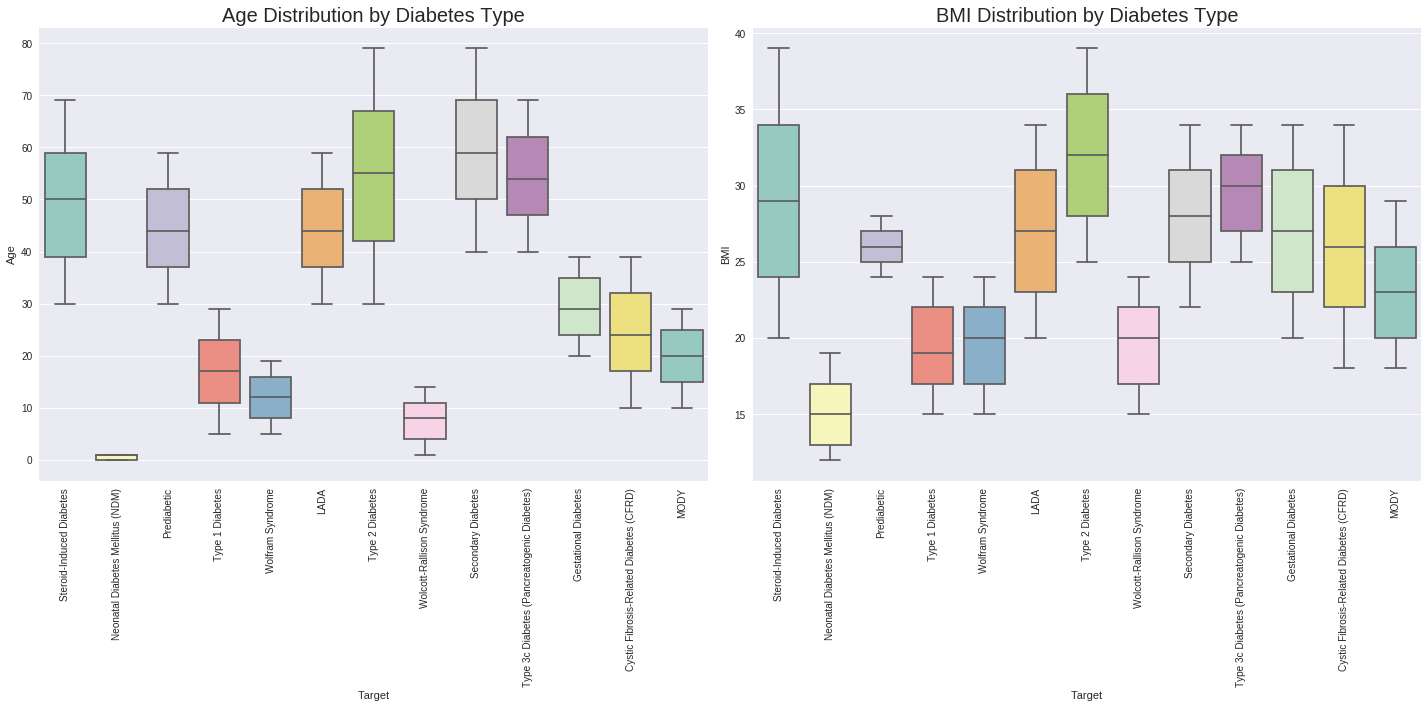

In [13]:
# The boxplot for both Age and Target for Diabetes type (Target).
plt.figure(figsize=(20,10))

# The boxplot of the Age and Target.
plt.subplot(1,2,1)
sns.boxplot(x='Target',y='Age',data=DiaStudy,palette='Set3')
plt.xticks(rotation=90) # rottation used to write the xticks in different direction.
plt.title('Age Distribution by Diabetes Type', size=20)

plt.subplot(1,2,2)
sns.boxplot(x='Target',y='BMI',data=DiaStudy,palette='Set3')
plt.xticks(rotation=90) # rottation used to write the xticks in different direction.
plt.title('BMI Distribution by Diabetes Type', size=20)

plt.tight_layout() # It'll adjusts subplot params fdo that the subplot(s) fits in to the figure area.
plt.show() #will show the graph.

From the previous two plot box graph we can see that each Diabetes type have a range of Age and BMI that it affects, and whenever the patient is older their BMI will become between higher range.

Also, from these two graphs whenever the person is older their BMI is becoming higher so there is a direct relationship between Age and BMI ranges for each diabeters type because whenever Age ranges are increasing, BMI ranges are increasing. 

To support this relationship between Age and BMI, I will represent the bar chart, scatter plot with regression line visualization tools.

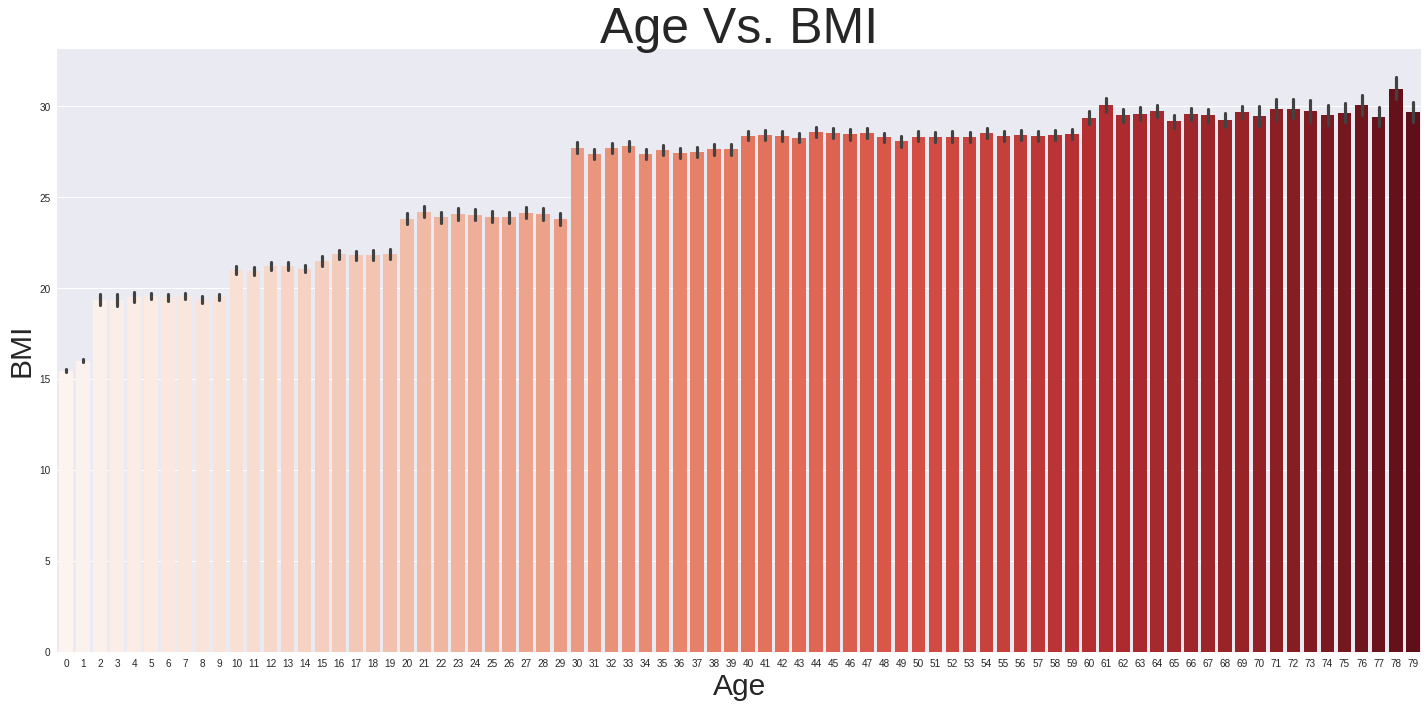

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(x='Age',y='BMI',data=DiaStudy, palette='Reds')
plt.title('Age Vs. BMI',size=50)
plt.xlabel('Age',size=30)
plt.ylabel('BMI',size=30)
plt.tight_layout()# It'll adjusts subplot params fdo that the subplot(s) fits in to the figure area.
plt.show() #will show the graph.

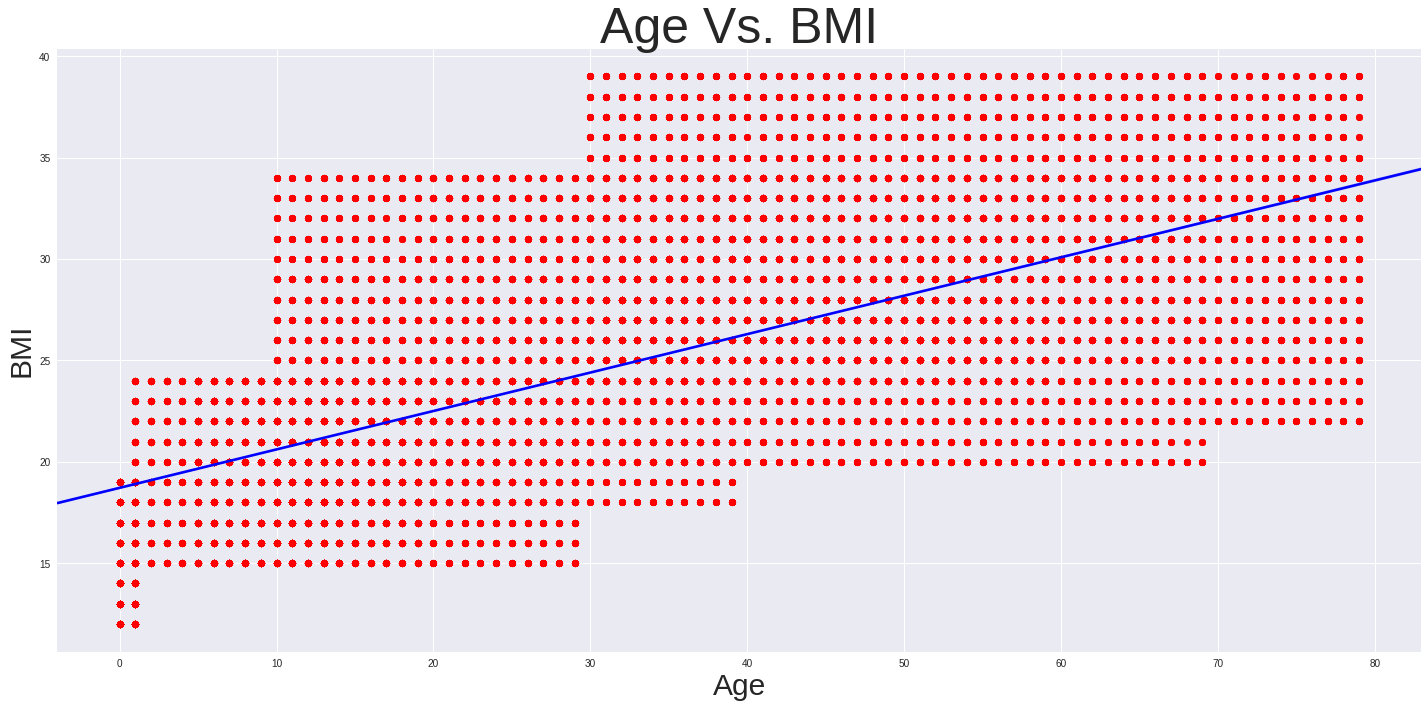

In [15]:
plt.figure(figsize=(20,10))
sns.regplot(x='Age',y='BMI',data=DiaStudy, scatter_kws={'color':'red','s':50},line_kws={'color':'blue'})
plt.title('Age Vs. BMI', size=50)
plt.xlabel('Age',size=30)
plt.ylabel('BMI',size=30)
plt.tight_layout()# It'll adjusts subplot params fdo that the subplot(s) fits in to the figure area.
plt.show() #will show the graph.

From these two visualization tools we can see that the relationship between Age and BMI is a Direct relationship.

Finally I'll use strip plot visualization tool to support my hypothesis that each range of Age and BMI are related to a diabetes type or specific group of diabetes types.

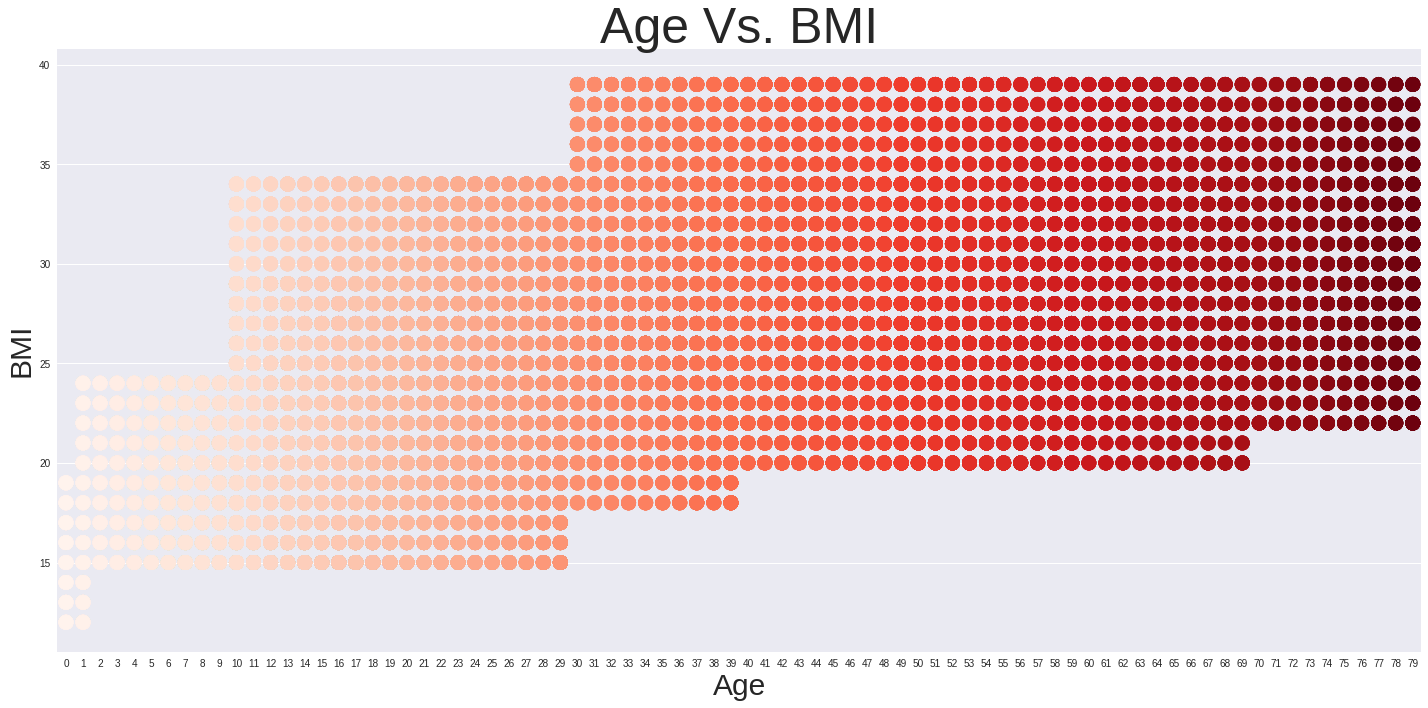

In [16]:
plt.figure(figsize=(20,10))
sns.stripplot(x='Age',y='BMI',data=DiaStudy, palette='Reds', size=15)
plt.title('Age Vs. BMI',size=50)
plt.xlabel('Age',size=30)
plt.ylabel('BMI',size=30)
plt.tight_layout()# It'll adjusts subplot params fdo that the subplot(s) fits in to the figure area.
plt.show() #will show the graph.

In conclusion, from the above visualization we can see that each Age range shows a direct relationship with the BMI range and from previous research I have done it has become clear that each Age range and BMI are associated with one type of diabetes or a subset of types of diabetes. So I can say that the hypothesis "There is a correlation between Age and BMI and each type or subset of diabetes (Target) affects a certain range of Ages and BMIs" is correct.

### Age & BMI Correlation

In [17]:
import scipy.stats

DiaRegresionLine = scipy.stats.linregress(DiaStudy['Age'],
                                         DiaStudy['BMI'])
m = DiaRegresionLine[0]
b = DiaRegresionLine[1]
print('The regression line: ({0} , {1})'.format(m,b))

The regression line: (0.18948769521267186 , 18.715414215046454)


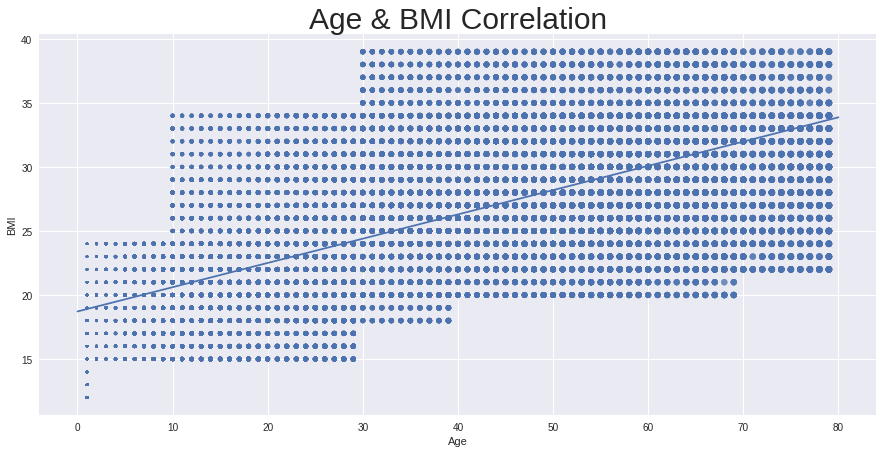

In [18]:
plt.figure(figsize=(15,7))
plt.scatter(DiaStudy['Age'],DiaStudy['BMI'],s=np.sqrt(DiaStudy['Age']*20),alpha=0.5)
x = np.linspace(0,80,40)
plt.plot(x, m*x + b)

plt.title('Age & BMI Correlation', size=30)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [19]:
scipy.stats.pearsonr(DiaStudy['Age'],DiaStudy['BMI'])

(0.66299735711152596, 0.0)

In [20]:
DiaCorr = DiaStudy['Age'].corr(DiaStudy['BMI'])
DiaCorr

0.66299735711152641

This result show a correlation coefficient of approximately r = 0.6630 with a `p` value of 0.0. This suggests a moderate to strong positive correlation between Age and BMI in the diabetes dataset, and `p` value indicates this correlation is statistically significant.